### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1133]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [1134]:
data = pd.read_csv('data/coupons.csv')

In [1135]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [1136]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

2. Investigate the dataset for missing or problematic data.

In [1137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [1138]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [1139]:
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [1140]:
null_percent = data.isnull().sum() / len(data) * 100
null_percent

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

As cars null value are more than 99% of the data, let's fill them with something instead of dropping them 

In [1141]:
data['car'] = data['car'].fillna('not available')

Now we can safely drop the na values, as we will still have more than 95% of our data

In [1142]:
data.dropna(inplace=True)

4. What proportion of the total observations chose to accept the coupon?



In [1143]:
print(data['Y'].value_counts())


Y
1    6877
0    5202
Name: count, dtype: int64


In [1144]:
len(data.query('Y == 1'))  / len(data) 


0.5693352098683666

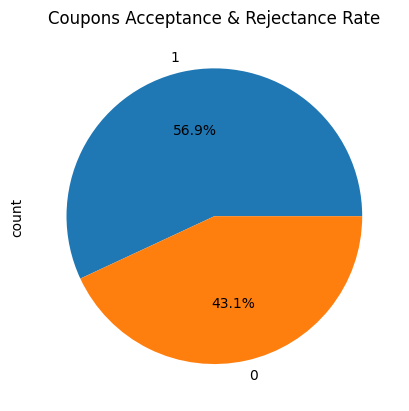

In [1145]:
data['Y'].value_counts().plot(kind='pie',autopct='%1.1f%%',title="Coupons Acceptance & Rejectance Rate")
plt.show()


5. Use a bar plot to visualize the `coupon` column.

In [1146]:
coupons_data = data['coupon'].value_counts()
coupons_data

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64

In [1147]:
px.bar( x=coupons_data.index, y=coupons_data.values,color=coupons_data.index,labels={'x':'Coupon type', 'y':'Coupon count'})

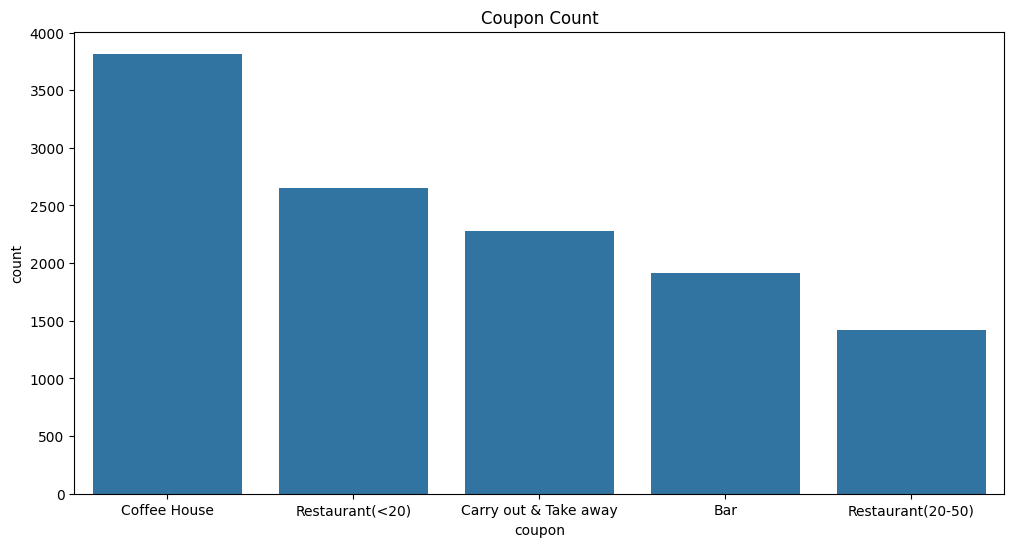

In [1148]:
plt.figure(figsize=(12,6))
fig = sns.barplot(x=coupons_data.index, y=coupons_data.values)
plt.title('Coupon Count')
plt.ylabel('count')
plt.show()


6. Use a histogram to visualize the temperature column.

In [1149]:
data['temperature'].value_counts()

temperature
80    6222
55    3662
30    2195
Name: count, dtype: int64

In [1150]:
px.histogram(data['temperature'],title='Temperature count',nbins=10,color=data['temperature'].values, labels={'value':'Temperature', 'count':'Temperature count'})

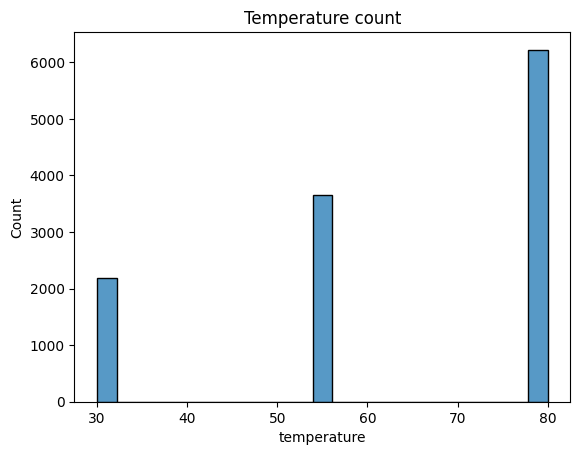

In [1151]:
sns.histplot(data['temperature'])
plt.title(label='Temperature count')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [1152]:
bar_coupons = data.query('coupon == "Bar"')

bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [1153]:
len(bar_coupons.query('Y == 1')) / len(bar_coupons) *100 # bar_coupons accepted out of total bar_coupons

41.19184526921067

41.19% bar coupons were accepted

In [1154]:
bar_coupons['Y'].value_counts()

Y
0    1125
1     788
Name: count, dtype: int64

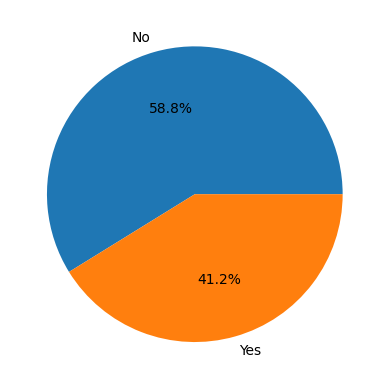

In [1155]:
plt.pie(bar_coupons['Y'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [1156]:
data.query('coupon == "Coffee House"')


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [1157]:
bar_coupons['Y'].value_counts()

Y
0    1125
1     788
Name: count, dtype: int64

In [1158]:
bar_coupons.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [1159]:
bar_coupons['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

##### Bar values = 'less1', '1~3', 'never' are for those who went to Bar 3 or fewer times.
##### Bar values = '4~8', 'gt8'  are for those who went to Bar more than 3 times.


In [1160]:
bar_coupons['Bar'].value_counts()

Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

In [1161]:
bar_coupons.loc[:,'Bar_Less4'] = bar_coupons['Bar'].isin(['never', 'less1', '1~3'])

/tmp/ipykernel_137885/3324199974.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1162]:
bar_coupons[['Bar_Less4','Bar']].value_counts() # verifying if gt8, 4~8 correctly got False or not

Bar_Less4  Bar  
True       never    788
           less1    553
           1~3      379
False      4~8      147
           gt8       46
Name: count, dtype: int64

In [1163]:
acceptance_rate_for_bar_less_than_4 = len(bar_coupons.query('Bar_Less4 == True and Y==1')) / len(bar_coupons.query('Bar_Less4 == True'))  *100
acceptance_rate_for_bar_less_than_4

37.26744186046512

In [1164]:
acceptance_rate_for_bar_more_than_3 = len(bar_coupons.query('Bar_Less4 == False and Y==1')) / len(bar_coupons.query('Bar_Less4 == False')) *100
acceptance_rate_for_bar_more_than_3

76.16580310880829

In [1165]:
acceptance_df = pd.DataFrame({'Category': ['Bar_less_than_equal_to_3', 'Bar_more_than_3'], 'Acceptance_Rate': [acceptance_rate_for_bar_less_than_4, acceptance_rate_for_bar_more_than_3]})
acceptance_df

,Category,Acceptance_Rate
0,Bar_less_than_equal_to_3,37.267442
1,Bar_more_than_3,76.165803


#### Acceptance Rate of Bar coupons is 76 % among those who visits Bar more than 3 times a month.
#### Acceptance Rate of Bar coupons is 37 % among those who visits Bar fewer than or equal to 3 times a month.


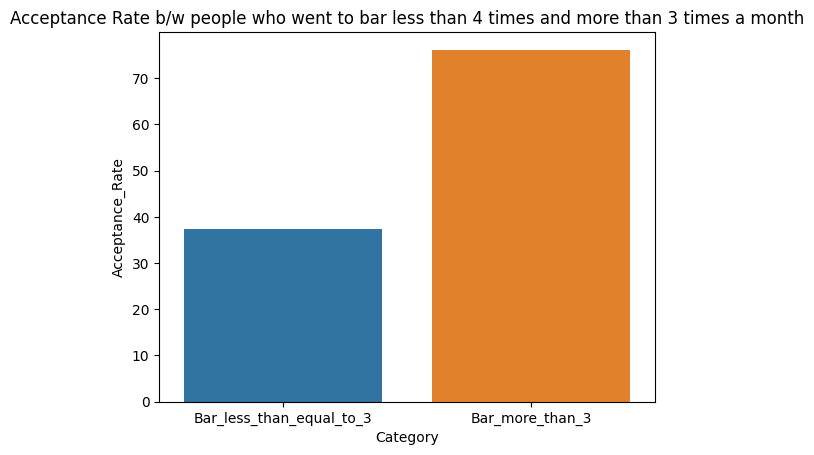

In [1166]:
sns.barplot(acceptance_df,x='Category', y='Acceptance_Rate',hue='Category',fill=True)
plt.title('Acceptance Rate b/w people who went to bar less than 4 times and more than 3 times a month')
plt.show()

In [1167]:
px.bar(acceptance_df,x="Category",y="Acceptance_Rate",color="Category")

#### CarryAway values

In [1168]:
data['CarryAway'].value_counts()

CarryAway
1~3      4502
4~8      4083
less1    1790
gt8      1573
never     131
Name: count, dtype: int64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [1169]:
bar_coupons.loc[:,'Bar_more1'] = bar_coupons['Bar'].isin(['1~3','4~8', 'gt8'])

/tmp/ipykernel_137885/948329965.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1170]:
bar_coupons[['Bar_more1','Bar']].value_counts()


Bar_more1  Bar  
False      never    788
           less1    553
True       1~3      379
           4~8      147
           gt8       46
Name: count, dtype: int64

In [1171]:
bar_coupons['age'].value_counts()

age
21         397
26         368
31         324
50plus     273
36         196
41         171
46         103
below21     81
Name: count, dtype: int64

### from above mentioned values: age>25 consists of the following: [26,31,36,41,46,'50plus']


In [1172]:
data_bar_more1_age_gt25 = bar_coupons.query(" Bar_more1 == True  and  age in ['26', '31', '36', '41', '46', '50plus']")

data_bar_more1_age_gt25

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Bar_Less4,Bar_more1
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,1~3,less1,1,0,0,0,1,1,True,True
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,1~3,less1,1,0,0,1,0,1,True,True
127,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Unmarried partner,...,1~3,less1,1,1,1,0,1,1,True,True
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,1,0,0,0,1,1,False,True
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,gt8,gt8,1,0,0,1,0,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,Unmarried partner,...,4~8,less1,1,1,0,0,1,1,True,True
12482,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,4~8,less1,1,1,0,0,1,1,True,True
12485,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,4~8,less1,1,1,0,0,1,1,True,True
12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,26,Unmarried partner,...,4~8,less1,1,1,0,0,1,1,True,True


In [1173]:
not_data_bar_more1_age_gt25 = bar_coupons[~bar_coupons.index.isin(data_bar_more1_age_gt25.index)]
not_data_bar_more1_age_gt25

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Bar_Less4,Bar_more1
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,less1,1,0,0,0,1,1,True,False
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,less1,1,0,0,1,0,1,True,False
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,4~8,less1,1,1,1,0,1,1,True,False
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,1~3,never,1,0,0,0,1,0,True,False
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,1~3,never,1,0,0,1,0,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,4~8,1~3,1,1,0,0,1,0,True,False
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,4~8,1~3,1,1,0,0,1,0,True,False
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,4~8,1~3,1,1,0,0,1,0,True,False
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,4~8,1~3,1,1,0,0,1,0,True,False


In [1174]:
acceptance_rate_for_bar_more1_age_more25 = len(data_bar_more1_age_gt25.query('Y==1')) / len(data_bar_more1_age_gt25)   * 100
acceptance_rate_for_bar_more1_age_more25

68.98263027295285

In [1175]:
acceptance_rate_for_bar_less1_age_less25 = len(not_data_bar_more1_age_gt25.query('Y==1')) / len(not_data_bar_more1_age_gt25)   * 100
acceptance_rate_for_bar_less1_age_less25

33.77483443708609

#### Acceptance Rate for those who go to Bar more than 1 time a month and are older than 25 years : 68.9 %
#### Acceptance Rate for those who don't go to Bar more than 1 time a month and are younger than 25 years : 33.7 % 


In [1176]:
acceptance_df = pd.DataFrame({'Category': ['acceptance_rate_for_bar_more1_age_more25', 'acceptance_rate_for_bar_less1_age_less25'], 'Acceptance_Rate': [acceptance_rate_for_bar_more1_age_more25, acceptance_rate_for_bar_less1_age_less25]})
acceptance_df

,Category,Acceptance_Rate
0,acceptance_rate_for_bar_more1_age_more25,68.982630
1,acceptance_rate_for_bar_less1_age_less25,33.774834


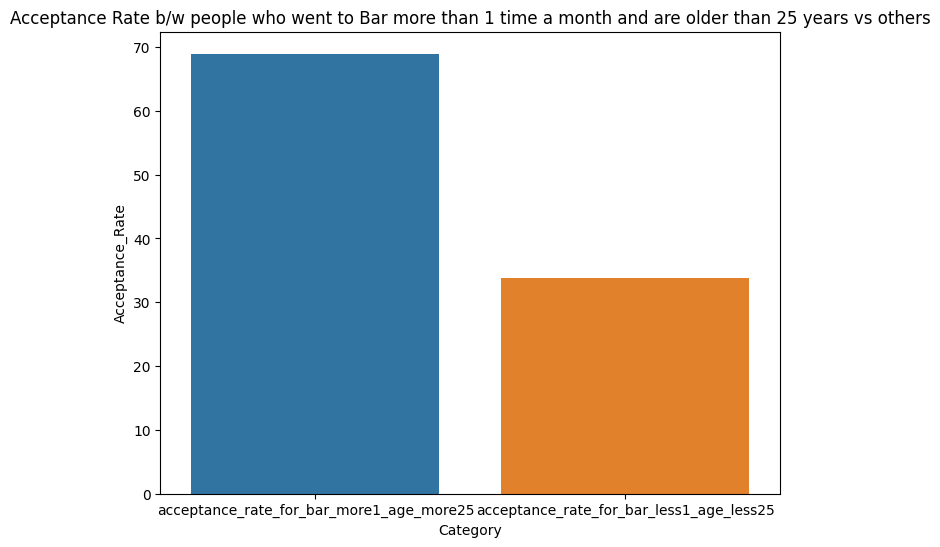

In [1177]:
plt.figure(figsize=(8,6))

sns.barplot(acceptance_df,x='Category', y='Acceptance_Rate',hue='Category',fill=True)
plt.title('Acceptance Rate b/w people who went to Bar more than 1 time a month and are older than 25 years vs others')
plt.show()

In [1178]:
px.bar(acceptance_df, x='Category', y='Acceptance_Rate', color='Category')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [1179]:
bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Bar_Less4,Bar_more1
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,less1,1,0,0,0,1,1,True,False
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,less1,1,0,0,1,0,1,True,False
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,4~8,less1,1,1,1,0,1,1,True,False
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,1~3,never,1,0,0,0,1,0,True,False
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,1~3,never,1,0,0,1,0,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,4~8,1~3,1,1,0,0,1,0,True,False
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,4~8,1~3,1,1,0,0,1,0,True,False
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,4~8,1~3,1,1,0,0,1,0,True,False
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,4~8,1~3,1,1,0,0,1,0,True,False


In [1180]:
bar_coupons.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Bar_Less4,Bar_more1
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,less1,1,0,0,0,1,1,True,False
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,less1,1,0,0,1,0,1,True,False


In [1181]:
bar_coupons['passanger'].unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [1182]:
bar_coupons['occupation'].value_counts()


occupation
Unemployed                                   292
Student                                      237
Computer & Mathematical                      225
Sales & Related                              175
Education&Training&Library                   125
Management                                   108
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Architecture & Engineering                    27
Personal Care & Service                       25
Construction & Extraction                     24
Life Phys

In [1183]:
data5 = bar_coupons.query('occupation != "Farming Fishing & Forestry" and passanger in ["Alone", "Friend(s)", "Partner"] and Bar_more1 == True'  )
data5

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Bar_Less4,Bar_more1
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,1,0,0,0,1,1,True,True
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1~3,1,0,0,1,0,1,True,True
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,1~3,1,1,1,0,1,0,True,True
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,1~3,less1,1,0,0,0,1,1,True,True
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,1~3,less1,1,0,0,1,0,1,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12500,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,Unmarried partner,...,4~8,less1,1,1,1,0,1,0,True,True
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,1,True,True
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,1,True,True
12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,True,True


In [1184]:
data5['occupation'].unique(), data5['Bar_more1'].unique(), data5['passanger'].unique()   ## verify 

(array(['Student', 'Healthcare Support', 'Management', 'Unemployed',
        'Sales & Related', 'Office & Administrative Support',
        'Construction & Extraction', 'Legal',
        'Life Physical Social Science', 'Retired',
        'Computer & Mathematical', 'Healthcare Practitioners & Technical',
        'Personal Care & Service', 'Architecture & Engineering',
        'Arts Design Entertainment Sports & Media', 'Protective Service',
        'Business & Financial', 'Food Preparation & Serving Related',
        'Installation Maintenance & Repair', 'Education&Training&Library',
        'Community & Social Services', 'Production Occupations',
        'Transportation & Material Moving',
        'Building & Grounds Cleaning & Maintenance'], dtype=object),
 array([ True]),
 array(['Friend(s)', 'Alone', 'Partner'], dtype=object))

In [1185]:
acceptance_rate_for_data5 = len(data5.query("Y == 1")) / len(data5)*100
acceptance_rate_for_data5

70.94339622641509

In [1186]:
not_data5  = bar_coupons[~bar_coupons.index.isin(data5.index)]


In [1187]:
acceptance_rate_for_not_data5 = len(not_data5.query("Y == 1")) / len(not_data5) *100

acceptance_rate_for_not_data5

29.790310918293567

In [1188]:
acceptance_df = pd.DataFrame({'Category': ['acceptance_rate_for_data5', 'acceptance_rate_for_not_data5'], 'Acceptance_Rate': [acceptance_rate_for_data5, acceptance_rate_for_not_data5]})
acceptance_df

,Category,Acceptance_Rate
0,acceptance_rate_for_data5,70.943396
1,acceptance_rate_for_not_data5,29.790311


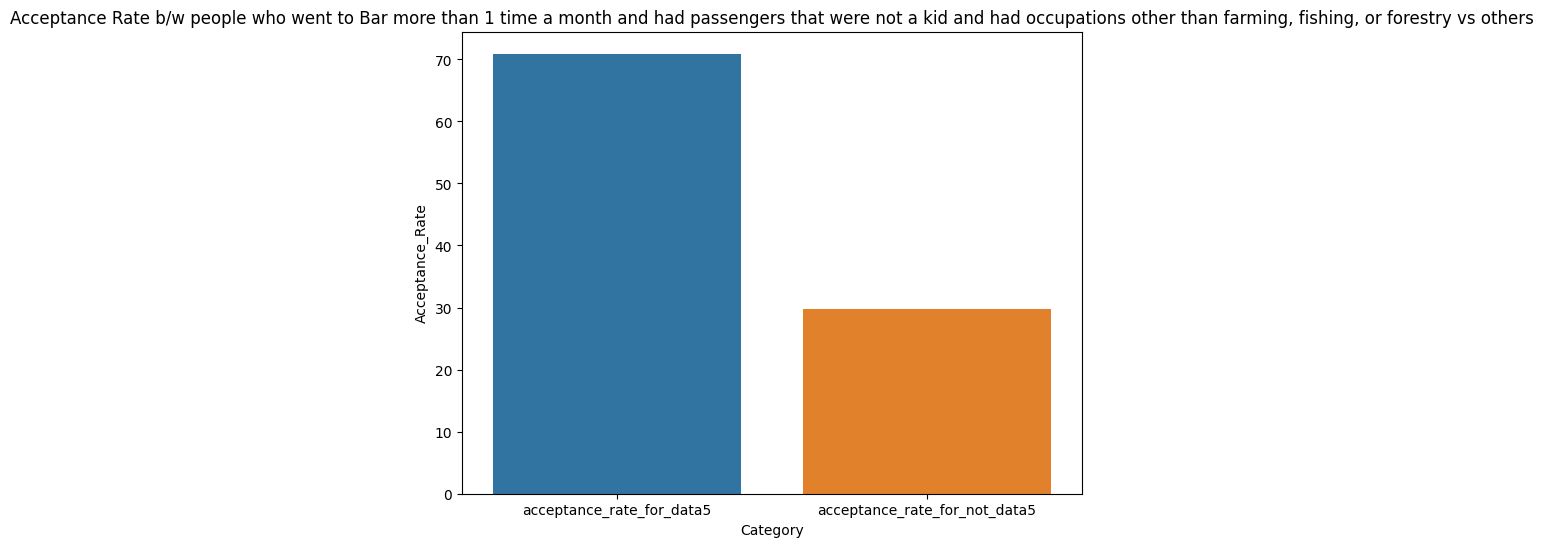

In [1189]:
plt.figure(figsize=(8,6))

sns.barplot(acceptance_df,x='Category', y='Acceptance_Rate',hue='Category',fill=True)
plt.title('Acceptance Rate b/w people who went to Bar more than 1 time a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry vs others')
plt.show()

In [1190]:
fig = px.bar(acceptance_df, x='Category', y='Acceptance_Rate', color='Category',text='Acceptance_Rate')

fig.update_traces(textposition='outside',texttemplate='%{text:.2f}')  
fig.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [1191]:
bar_coupons['maritalStatus'].unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

In [1192]:
bar_coupons['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [1193]:
bar_coupons['income'].value_counts()

income
$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: count, dtype: int64

In [1194]:
bar_coupons['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      839
4~8      548
less1    312
gt8      186
never     28
Name: count, dtype: int64

In [1195]:
data6 = bar_coupons.query(  
        '(maritalStatus != "Widowed" and passanger in ["Alone", "Friend(s)", "Partner"] and Bar_more1 == True) '
             
        "or ( Bar_more1 == True and age in ['26', '21', 'below21'] )"
             
        "or (RestaurantLessThan20 in ['4~8','gt8'] and income in ['Less than $12500', '$12500 - $24999','$25000 - $37499 ','$37500 - $49999'])"
             
        )
data6

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Bar_Less4,Bar_more1
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,1,0,0,0,1,1,True,True
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1~3,1,0,0,1,0,1,True,True
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,1~3,1,1,1,0,1,0,True,True
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,1~3,less1,1,0,0,0,1,1,True,True
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,1~3,less1,1,0,0,1,0,1,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12500,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,Unmarried partner,...,4~8,less1,1,1,1,0,1,0,True,True
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,1,True,True
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,1,True,True
12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,True,True


In [1196]:
acceptance_rate_for_data6 = len(data6.query('Y==1')) / len(data6) *100
acceptance_rate_for_data6

61.51645207439199

In [1197]:
not_data6 = bar_coupons[~ bar_coupons.index.isin(data6.index)]
not_data6.shape

(1214, 28)

In [1198]:
acceptance_rate_for_not_data6 = len(not_data6.query('Y==1')) / len(not_data6) *100
acceptance_rate_for_not_data6

29.489291598023065

In [1199]:
acceptance_df = pd.DataFrame({'Category': ['acceptance_rate_for_data6', 'acceptance_rate_for_not_data6'], 'Acceptance_Rate': [acceptance_rate_for_data6, acceptance_rate_for_not_data6]})
acceptance_df

,Category,Acceptance_Rate
0,acceptance_rate_for_data6,61.516452
1,acceptance_rate_for_not_data6,29.489292


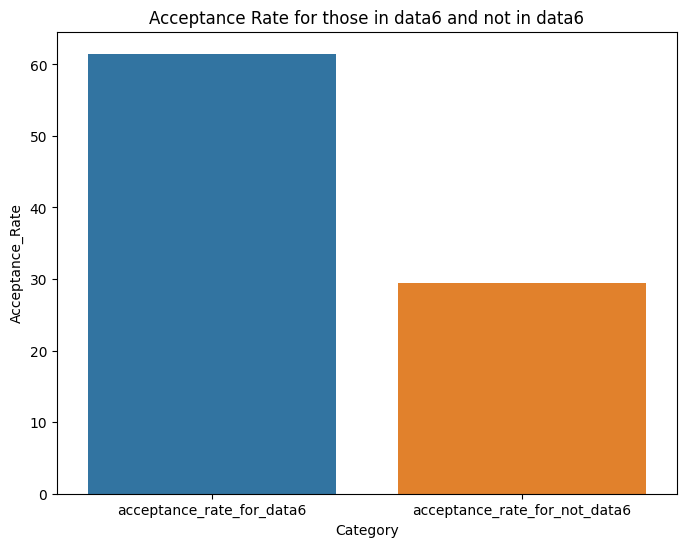

In [1244]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=acceptance_df, x='Category', y='Acceptance_Rate', hue='Category', fill=True)
plt.title('Acceptance Rate for those in data6 and not in data6')
plt.show()

In [1201]:
px.bar(acceptance_df, x='Category', y='Acceptance_Rate', color='Category')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Acceptance Rate of Bar coupons is 76 % among those who visits Bar more than 3 times a month.
#### Acceptance Rate of Bar coupons is 37 % among those who visits Bar fewer than or equal to 3 times a month.



#### Acceptance Rate for those who go to Bar more than 1 time a month and are older than 25 years : 68.9 %
#### Acceptance Rate for those who don't go to Bar more than 1 time a month and are younger than 25 years : 33.7 % 


#### Acceptance Rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 70.94% vs 29% to the remaining




#### Acceptance rates for those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

: 61.5%  
### vs those who don't

: 29.4%

## From, above insights, it seems like the coupon acceptance rate is higher among the " frequent Bar visiters, people older than 25 years, people who don't have Kid(s) with them, maybe who frequently visits cheap Restaurants, etc. "

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [1202]:
data[['Y','direction_same','direction_opp']].value_counts()


Y  direction_same  direction_opp
1  0               1                5362
0  0               1                4118
1  1               0                1515
0  1               0                1084
Name: count, dtype: int64

Majority of accepted coupons have venue in opposite side of destination, so direction might not be that relevant to acceptance considering real_life scenario

In [1203]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [1204]:
counts = data[['Y','toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'
       ]].value_counts()


this tells us, that the acceptance rate is higher in cases where time to reach coupon's venue is less :  make sense

In [1205]:
data[['Y','expiration']].value_counts()


Y  expiration
1  1d            4244
0  2h            2686
1  2h            2633
0  1d            2516
Name: count, dtype: int64

expiration duration for majority of accepted coupons is high

In [1206]:
data_accepted = data.query('Y==1')

### Check which coupon got maximum number of acceptances

In [1207]:
data_accepted['coupon'].value_counts()


coupon
Coffee House             1894
Restaurant(<20)          1881
Carry out & Take away    1682
Bar                       788
Restaurant(20-50)         632
Name: count, dtype: int64

In total, Coffee coupons has highest number of acceptance.

### Check which coupon got maximum Acceptance Rate (not just the Accepted number, as the accepted count is sensitive to no. of coupons offered for a Category)

In [1208]:
Coupon_acceptance_rate =  data.groupby(['coupon'])['Y'].mean()
Coupon_acceptance_rate =  pd.DataFrame(Coupon_acceptance_rate)
Coupon_acceptance_rate.reset_index(inplace=True)
Coupon_acceptance_rate.rename(columns={'Y':'AcceptanceRate'}, inplace=True)
Coupon_acceptance_rate


,coupon,AcceptanceRate
0,Bar,0.411918
1,Carry out & Take away,0.737719
2,Coffee House,0.496331
3,Restaurant(20-50),0.446013
4,Restaurant(<20),0.709009


In [1209]:
Coupon_acceptance_rate.sort_values('AcceptanceRate',ascending=False)

,coupon,AcceptanceRate
1,Carry out & Take away,0.737719
4,Restaurant(<20),0.709009
2,Coffee House,0.496331
3,Restaurant(20-50),0.446013
0,Bar,0.411918


### Acceptance Rate is highest for Carry out & Take away coupons

let's explore them

In [1210]:
carry_out_copuons = data.query('coupon == "Carry out & Take away"')
carry_out_copuons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
41,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
47,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
55,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12665,No Urgent Place,Friend(s),Sunny,30,10AM,Carry out & Take away,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12672,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,1,0,0
12673,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,0
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1


In [1211]:
carry_out_copuons['maritalStatus'].value_counts()

maritalStatus
Single               894
Married partner      894
Unmarried partner    364
Divorced             108
Widowed               20
Name: count, dtype: int64

In [1212]:
carry_out_copuons[['maritalStatus','passanger']].value_counts()


maritalStatus      passanger
Single             Alone        601
Married partner    Alone        436
                   Friend(s)    287
Single             Friend(s)    280
Unmarried partner  Alone        216
Married partner    Kid(s)       120
Unmarried partner  Friend(s)    105
Divorced           Alone         76
Married partner    Partner       51
Unmarried partner  Partner       30
Divorced           Friend(s)     26
Unmarried partner  Kid(s)        13
Single             Partner       10
Widowed            Alone         10
                   Friend(s)      9
Divorced           Kid(s)         6
Single             Kid(s)         3
Widowed            Partner        1
Name: count, dtype: int64

In [1213]:
carry_out_copuons_passanger = carry_out_copuons[['passanger']].value_counts()
carry_out_copuons_passanger


passanger
Alone        1339
Friend(s)     707
Kid(s)        142
Partner        92
Name: count, dtype: int64

In [1214]:
carry_out_copuons['maritalStatus'].value_counts()

maritalStatus
Single               894
Married partner      894
Unmarried partner    364
Divorced             108
Widowed               20
Name: count, dtype: int64

In [1215]:
carry_out_copuons_passanger_marital = carry_out_copuons[['passanger','maritalStatus','Y']].value_counts()
carry_out_copuons_passanger_marital

passanger  maritalStatus      Y
Alone      Single             1    447
           Married partner    1    318
Friend(s)  Single             1    224
           Married partner    1    210
Alone      Single             0    154
           Unmarried partner  1    153
           Married partner    0    118
Kid(s)     Married partner    1     84
Friend(s)  Married partner    0     77
           Unmarried partner  1     75
Alone      Unmarried partner  0     63
Friend(s)  Single             0     56
Alone      Divorced           1     53
Partner    Married partner    1     40
Kid(s)     Married partner    0     36
Friend(s)  Unmarried partner  0     30
Alone      Divorced           0     23
Friend(s)  Divorced           1     21
Partner    Unmarried partner  1     20
           Married partner    0     11
           Unmarried partner  0     10
Kid(s)     Unmarried partner  1     10
Alone      Widowed            1      9
Friend(s)  Widowed            1      7
           Divorced           0 

In [1216]:
carry_out_copuons_passanger_marital = pd.DataFrame(carry_out_copuons_passanger_marital)
carry_out_copuons_passanger_marital.reset_index(inplace=True)
carry_out_copuons_passanger_marital

,passanger,maritalStatus,Y,count
0,Alone,Single,1,447
1,Alone,Married partner,1,318
2,Friend(s),Single,1,224
3,Friend(s),Married partner,1,210
4,Alone,Single,0,154
5,Alone,Unmarried partner,1,153
6,Alone,Married partner,0,118
7,Kid(s),Married partner,1,84
8,Friend(s),Married partner,0,77
9,Friend(s),Unmarried partner,1,75


In [1217]:
carry_out_copuons_passanger_marital_acceptance_rate =  carry_out_copuons.groupby(['passanger','maritalStatus'])['Y'].mean()
carry_out_copuons_passanger_marital_acceptance_rate =  pd.DataFrame(carry_out_copuons_passanger_marital_acceptance_rate)
carry_out_copuons_passanger_marital_acceptance_rate.reset_index(inplace=True)
carry_out_copuons_passanger_marital_acceptance_rate.rename(columns={'Y':'AcceptanceRate'}, inplace=True)
carry_out_copuons_passanger_marital_acceptance_rate


,passanger,maritalStatus,AcceptanceRate
0,Alone,Divorced,0.697368
1,Alone,Married partner,0.729358
2,Alone,Single,0.743760
3,Alone,Unmarried partner,0.708333
4,Alone,Widowed,0.900000
5,Friend(s),Divorced,0.807692
6,Friend(s),Married partner,0.731707
7,Friend(s),Single,0.800000
8,Friend(s),Unmarried partner,0.714286
9,Friend(s),Widowed,0.777778


In [1218]:
fig = px.bar(
    carry_out_copuons_passanger_marital_acceptance_rate,  
    x='maritalStatus',
    y='AcceptanceRate',
    color='passanger',
    barmode='group',
    text='AcceptanceRate'

)

fig.update_traces(textposition='outside', texttemplate='%{text:.2f}')
fig.update_layout(yaxis_tickformat=".0%", yaxis_title="Acceptance Rate") # for percentage
fig.show()


In [1219]:
px.line(
    carry_out_copuons_passanger_marital_acceptance_rate,  
    x='maritalStatus',
    y='AcceptanceRate',
    color='passanger',
)


In [1220]:
carry_out_copuons_passanger_marital_acceptance_rate.sort_values('AcceptanceRate')

,passanger,maritalStatus,AcceptanceRate
12,Kid(s),Single,0.333333
15,Partner,Single,0.500000
10,Kid(s),Divorced,0.666667
16,Partner,Unmarried partner,0.666667
0,Alone,Divorced,0.697368
11,Kid(s),Married partner,0.700000
3,Alone,Unmarried partner,0.708333
8,Friend(s),Unmarried partner,0.714286
1,Alone,Married partner,0.729358
6,Friend(s),Married partner,0.731707


In [1221]:
carry_out_copuons_passanger_marital = pd.DataFrame(carry_out_copuons_passanger_marital)
carry_out_copuons_passanger_marital.reset_index(inplace=True)
carry_out_copuons_passanger_marital

,index,passanger,maritalStatus,Y,count
0,0,Alone,Single,1,447
1,1,Alone,Married partner,1,318
2,2,Friend(s),Single,1,224
3,3,Friend(s),Married partner,1,210
4,4,Alone,Single,0,154
5,5,Alone,Unmarried partner,1,153
6,6,Alone,Married partner,0,118
7,7,Kid(s),Married partner,1,84
8,8,Friend(s),Married partner,0,77
9,9,Friend(s),Unmarried partner,1,75


In [1222]:
carry_out_copuons_passanger_marital_total_count = carry_out_copuons_passanger_marital.groupby(['passanger','maritalStatus'])['count'].sum()
carry_out_copuons_passanger_marital_total_count = pd.DataFrame(carry_out_copuons_passanger_marital_total_count)
carry_out_copuons_passanger_marital_total_count.reset_index(inplace=True)
carry_out_copuons_passanger_marital_total_count

,passanger,maritalStatus,count
0,Alone,Divorced,76
1,Alone,Married partner,436
2,Alone,Single,601
3,Alone,Unmarried partner,216
4,Alone,Widowed,10
5,Friend(s),Divorced,26
6,Friend(s),Married partner,287
7,Friend(s),Single,280
8,Friend(s),Unmarried partner,105
9,Friend(s),Widowed,9


In [1223]:
carry_out_copuons_passanger_marital_acceptance_rate_total_count = carry_out_copuons_passanger_marital_total_count.merge(carry_out_copuons_passanger_marital_acceptance_rate, on=['passanger','maritalStatus'])  
carry_out_copuons_passanger_marital_acceptance_rate_total_count

,passanger,maritalStatus,count,AcceptanceRate
0,Alone,Divorced,76,0.697368
1,Alone,Married partner,436,0.729358
2,Alone,Single,601,0.743760
3,Alone,Unmarried partner,216,0.708333
4,Alone,Widowed,10,0.900000
5,Friend(s),Divorced,26,0.807692
6,Friend(s),Married partner,287,0.731707
7,Friend(s),Single,280,0.800000
8,Friend(s),Unmarried partner,105,0.714286
9,Friend(s),Widowed,9,0.777778


In [1224]:
carry_out_copuons_passanger_marital_acceptance_rate_total_count['label'] = (
    carry_out_copuons_passanger_marital_acceptance_rate_total_count['AcceptanceRate'].apply(lambda x: f"{x:.1%}") +
    " (" +
    carry_out_copuons_passanger_marital_acceptance_rate_total_count['count'].astype(str) +
    ")"
)

carry_out_copuons_passanger_marital_acceptance_rate_total_count


,passanger,maritalStatus,count,AcceptanceRate,label
0,Alone,Divorced,76,0.697368,69.7% (76)
1,Alone,Married partner,436,0.729358,72.9% (436)
2,Alone,Single,601,0.743760,74.4% (601)
3,Alone,Unmarried partner,216,0.708333,70.8% (216)
4,Alone,Widowed,10,0.900000,90.0% (10)
5,Friend(s),Divorced,26,0.807692,80.8% (26)
6,Friend(s),Married partner,287,0.731707,73.2% (287)
7,Friend(s),Single,280,0.800000,80.0% (280)
8,Friend(s),Unmarried partner,105,0.714286,71.4% (105)
9,Friend(s),Widowed,9,0.777778,77.8% (9)


In [1225]:
fig = px.bar(
    carry_out_copuons_passanger_marital_acceptance_rate_total_count,
    x='maritalStatus',
    y='AcceptanceRate',
    color='passanger',
    barmode='group',
    text='label', 
    title="Acceptance Rate by Passenger and Marital Status (Count in Brackets)"
)

fig.update_traces(textposition='outside')
fig.update_layout(yaxis_tickformat=".0%", yaxis_title="Acceptance Rate") # for percentage
fig.show()


In [1226]:
fig = px.bar(
    carry_out_copuons_passanger_marital_acceptance_rate_total_count,
    x='passanger',
    y='AcceptanceRate',
    color='maritalStatus',
    barmode='group',
    text='label', 
    title="Acceptance Rate by Passenger and Marital Status"


)

fig.update_traces(textposition='outside')  
fig.update_layout(yaxis_tickformat=".0%", yaxis_title="Acceptance Rate")
fig.show()



In [1227]:
carry_out_copuons_passanger_marital_acceptance_rate_total_count.sort_values(['AcceptanceRate','count'],ascending=False)


,passanger,maritalStatus,count,AcceptanceRate,label
17,Partner,Widowed,1,1.000000,100.0% (1)
4,Alone,Widowed,10,0.900000,90.0% (10)
5,Friend(s),Divorced,26,0.807692,80.8% (26)
7,Friend(s),Single,280,0.800000,80.0% (280)
14,Partner,Married partner,51,0.784314,78.4% (51)
9,Friend(s),Widowed,9,0.777778,77.8% (9)
13,Kid(s),Unmarried partner,13,0.769231,76.9% (13)
2,Alone,Single,601,0.743760,74.4% (601)
6,Friend(s),Married partner,287,0.731707,73.2% (287)
1,Alone,Married partner,436,0.729358,72.9% (436)


## For Carry out coupons:
### Singles having Kid(s) as passanger, has lowest Acceptance Rate,
### Widowed having Partner as passanger, has highest Acceptance Rate.

### Note: Above insights are not statistically correct, they are biased, as their count is also very low.
### It is good if we look at the counts as well as Rate.



#### Let's also explore, the Acceptance Rate by maritalStatus for all coupons

In [1228]:
d = data[['Y','passanger','maritalStatus']].value_counts()
d = pd.DataFrame(d)
d.reset_index(inplace=True)
d

,Y,passanger,maritalStatus,count
0,1,Alone,Single,1704
1,0,Alone,Single,1299
2,1,Alone,Married partner,1235
3,0,Alone,Married partner,1232
4,1,Friend(s),Single,1033
5,1,Friend(s),Married partner,698
6,0,Alone,Unmarried partner,551
7,1,Alone,Unmarried partner,544
8,0,Friend(s),Single,444
9,0,Kid(s),Married partner,404


In [1229]:
marital_counts = data['maritalStatus'].value_counts()
marital_counts = pd.DataFrame(marital_counts)
marital_counts.reset_index(inplace=True)
marital_counts


,maritalStatus,count
0,Married partner,4831
1,Single,4588
2,Unmarried partner,2048
3,Divorced,504
4,Widowed,108


In [1230]:
marital_counts

,maritalStatus,count
0,Married partner,4831
1,Single,4588
2,Unmarried partner,2048
3,Divorced,504
4,Widowed,108


In [1231]:
d

,Y,passanger,maritalStatus,count
0,1,Alone,Single,1704
1,0,Alone,Single,1299
2,1,Alone,Married partner,1235
3,0,Alone,Married partner,1232
4,1,Friend(s),Single,1033
5,1,Friend(s),Married partner,698
6,0,Alone,Unmarried partner,551
7,1,Alone,Unmarried partner,544
8,0,Friend(s),Single,444
9,0,Kid(s),Married partner,404


In [1232]:
d['AcceptanceRate'] = d.apply(lambda x: x["count"] / d.query('maritalStatus == @x["maritalStatus"] and passanger == @x["passanger"]')['count'].sum() *100, axis=1)
d

,Y,passanger,maritalStatus,count,AcceptanceRate
0,1,Alone,Single,1704,56.743257
1,0,Alone,Single,1299,43.256743
2,1,Alone,Married partner,1235,50.060803
3,0,Alone,Married partner,1232,49.939197
4,1,Friend(s),Single,1033,69.939066
5,1,Friend(s),Married partner,698,65.725047
6,0,Alone,Unmarried partner,551,50.319635
7,1,Alone,Unmarried partner,544,49.680365
8,0,Friend(s),Single,444,30.060934
9,0,Kid(s),Married partner,404,50.311333


In [1233]:
acceptance  = d.query('Y == 1')
acceptance

,Y,passanger,maritalStatus,count,AcceptanceRate
0,1,Alone,Single,1704,56.743257
2,1,Alone,Married partner,1235,50.060803
4,1,Friend(s),Single,1033,69.939066
5,1,Friend(s),Married partner,698,65.725047
7,1,Alone,Unmarried partner,544,49.680365
10,1,Kid(s),Married partner,399,49.688667
12,1,Friend(s),Unmarried partner,295,65.848214
13,1,Partner,Married partner,291,58.316633
14,1,Partner,Unmarried partner,262,61.214953
18,1,Alone,Divorced,161,47.214076


In [1234]:
marital_acceptance = d.copy()

In [1235]:
marital_counts

,maritalStatus,count
0,Married partner,4831
1,Single,4588
2,Unmarried partner,2048
3,Divorced,504
4,Widowed,108


In [1236]:
marital_acceptance.query('Y == 1').groupby('maritalStatus')['count'].sum()


maritalStatus
Divorced              265
Married partner      2623
Single               2800
Unmarried partner    1138
Widowed                51
Name: count, dtype: int64

In [1237]:
marital_acceptance['maritalAcceptanceRate'] = marital_acceptance.apply(lambda x: x["count"] / d.query('maritalStatus == @x["maritalStatus"] ')['count'].sum() *100, axis=1)
marital_acceptance

,Y,passanger,maritalStatus,count,AcceptanceRate,maritalAcceptanceRate
0,1,Alone,Single,1704,56.743257,37.140366
1,0,Alone,Single,1299,43.256743,28.312990
2,1,Alone,Married partner,1235,50.060803,25.564065
3,0,Alone,Married partner,1232,49.939197,25.501966
4,1,Friend(s),Single,1033,69.939066,22.515257
5,1,Friend(s),Married partner,698,65.725047,14.448354
6,0,Alone,Unmarried partner,551,50.319635,26.904297
7,1,Alone,Unmarried partner,544,49.680365,26.562500
8,0,Friend(s),Single,444,30.060934,9.677419
9,0,Kid(s),Married partner,404,50.311333,8.362658


In [1238]:
marital_acceptance = acceptance.groupby('maritalStatus')['AcceptanceRate'].mean()
marital_acceptance = pd.DataFrame(marital_acceptance)
marital_acceptance.reset_index(inplace=True)
marital_acceptance

,maritalStatus,AcceptanceRate
0,Divorced,57.621240
1,Married partner,55.947788
2,Single,60.506898
3,Unmarried partner,56.198870
4,Widowed,43.549044


In [1239]:
px.bar(marital_acceptance, x=marital_acceptance.maritalStatus, y='AcceptanceRate', title='Acceptance Rate by Marital Status',color=marital_acceptance.maritalStatus)


### Acceptance rate is maximum for Singles, minimum for Widowed